In [3]:
from matplotlib import pyplot as plt

In [4]:
def parse_csv(file_name):
    data = {}
    cur_data = None
    with open(file_name) as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith("ultrasound"):  # New sensor
                sensor_name = line[len("ultrasound"):]
                data[sensor_name] = []
                cur_data = data[sensor_name]
                continue
            line_parts = line.split(",")
            assert len(line_parts) == 2
            if line_parts[0] == "time" and line_parts[1] == "distance":  # correct header
                continue
            try:
                time_stamp = float(line_parts[0])
                distance = float(line_parts[1])
                cur_data.append((time_stamp, distance))
            except ValueError:
                print(f"Could not parse data line '{line}'")
    return data

In [5]:
data = parse_csv("logs/hall_angle_45_into_from_hall_three_times_1.csv")

In [6]:
def plot_data(data):
    for name, plt_data in data.items():
        x_vals = [d[0] for d in plt_data]
        y_vals = [d[1] for d in plt_data]
        plt.plot(x_vals, y_vals, label=name)
    plt.legend()

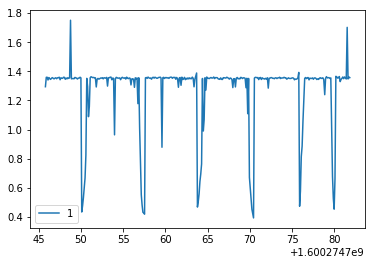

In [7]:
plot_data(data)